1. Define the neural network structure
2. Initialize the model's parameters
3. Loop
   - Inplement forward propagation
   - Compute Loss
   - Implement backward propagation to get the gradients
   - Update parameters(gradient descent)

data: https://github.com/oreilly-japan/deep-learning-from-scratch-2/blob/master/dataset/spiral.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [1]:
# def load_data(seed=0):
#     np.random.seed(0)
#     N = 100 # 1クラスあたりのデータ数
#     D = 2 # 次元
#     K = 3 # クラス数
#     X = np.zeros((N*K,D))
#     y = np.zeros(N*K, dtype='uint8')
#     for j in range(K):
#       ix = range(N*j,N*(j+1))
#       r = np.linspace(0.0,1,N) # radius
#       t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
#       X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
#       y[ix] = j
    
#     return X, y

def load_data(seed=0):
    np.random.seed(seed)
    N = 100  # クラスごとのサンプル数
    DIM = 2  # データの要素数
    CLS_NUM = 3  # クラス数

    x = np.zeros((N*CLS_NUM, DIM))
    y = np.zeros((N*CLS_NUM, 1), dtype=np.int)

    for j in range(CLS_NUM):
        for i in range(N):#N*j, N*(j+1)):
            rate = i / N
            radius = 1.0*rate
            theta = j*4.0 + 4.0*rate + np.random.randn()*0.2

            ix = N*j + i
            x[ix] = np.array([radius*np.sin(theta),
                              radius*np.cos(theta)]).flatten()
            y[ix] = j

    return x, y

X, y = load_data()
print(X.shape)
print(y.shape)

(300, 2)
(300, 1)


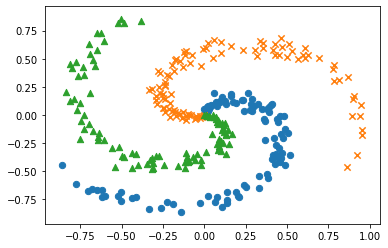

In [2]:
# データ点のプロット
N = 100
num_class = 3
markers = ['o', 'x', '^']
for i in range(num_class):
    plt.scatter(X[i*N:(i+1)*N, 0], X[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

In [19]:
def softmax(x):
    exp_scores = np.exp(x)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return probs

# 二次元データセット

In [3]:
from sklearn.datasets import make_moons
X, y_ = make_moons(n_samples=100, random_state=0, noise=.3)
y = y_.reshape((y_.shape[0], -1))
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


In [28]:
np.unique(y_)

array([0, 1])

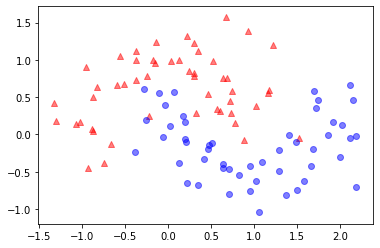

In [4]:
plt.scatter(X[y_==0, 0], X[y_==0, 1], color='r', marker='^', alpha=0.5)
plt.scatter(X[y_==1, 0], X[y_==1, 1],color='b', marker='o', alpha=0.5)
plt.show()

## そのほかのデータセット

```python 
def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()


datasets = {"noisy_circles": noisy_circles,
             "noisy_moons": noisy_moons,
             "blobs": blobs,
             "gaussian_quantiles": gaussian_quantiles}

dataset = "noisy_moons"

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
   Y = Y%2
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);
```

# Logistic regression

In [5]:
# Train the logistic regression classifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
clf = LogisticRegressionCV()
clf.fit(X, y_)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

(63525,)
Accuracy of logistic regression: 85 % (percentage of correctly labelled datapoints)


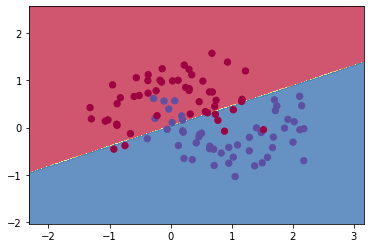

In [6]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) でもいける
Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
print(Z.shape)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y_, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

# Print accuracy
y_pred_lr = clf.predict(X)
score = accuracy_score(y_, y_pred_lr)
print ('Accuracy of logistic regression: %d ' % (score * 100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
# 1. Define neural network stracture
n_x = X.shape[1] # 特徴量の数がinput
n_h = 4 # 適当
n_y = 1 # 2クラス分類だから1つの確率で決まる


In [10]:
num_iteration = 30000
n_samples = X.shape[0]

# 2. Initialize the model's param
W1 = np.random.randn(n_x, n_h) * 0.01
W2 = np.random.randn(n_h, n_y) * 0.01
b1 = np.zeros((1, n_h))
b2 = np.zeros((1, n_y))

for i in range(num_iteration):

    # forward propagation
    Z1 = np.dot(X, W1) + b1 #隠れ層
    A1 = sigmoid(Z1) # 活性化関数
    Z2 = np.dot(A1, W2) + b2 # 出力層
    assert Z2.shape == (n_samples, 1)
    
    # y_out = a2
    y_out = sigmoid(Z2) # 確率(0~1)

    # コスト関数
    cost =  -1 / n_samples * np.sum((np.log(y_out)*y) + (np.log(1-y_out))*(1-y))
    assert(isinstance(cost, float))

    # dscores = y_out
    # dscores[range(n_samples), y] -= -1
    # dscores /= n_samples

    # back propagation
    dZ2 = y_out - y
    # dW2 = np.dot(A1.T, dscores)
    dW2 = np.dot(A1.T, dZ2) / n_samples
    assert dW2.shape == W2.shape
    # db2 = np.sum(dscores, axis=1) / n_samples
    db2 = np.sum(dZ2, axis=0, keepdims=True) / n_samples
    dZ1 = np.dot(dZ2, W2.T) * (A1 - np.power(A1, 2)) # tanhだったら(1-np.power(A1, 2))
    dW1 = np.dot(X.T, dZ1) / n_samples
    db1 = np.sum(dZ1, axis=0, keepdims=True) / n_samples

    # update parameters
    lr = 1e-0
    W1 -= lr * dW1
    W2 -= lr * dW2
    b1 -= lr * db1
    b2 -= b2 * db2
    
    if i % 1000 == 0:
        print('iteration %d:loss %f' % (i, cost))

iteration 0:loss 0.693154
iteration 1000:loss 0.338136
iteration 2000:loss 0.333331
iteration 3000:loss 0.153282
iteration 4000:loss 0.105844
iteration 5000:loss 0.097942
iteration 6000:loss 0.095453
iteration 7000:loss 0.094155
iteration 8000:loss 0.093274
iteration 9000:loss 0.092585
iteration 10000:loss 0.092007
iteration 11000:loss 0.091507
iteration 12000:loss 0.091067
iteration 13000:loss 0.090675
iteration 14000:loss 0.090324
iteration 15000:loss 0.090006
iteration 16000:loss 0.089714
iteration 17000:loss 0.089445
iteration 18000:loss 0.089192
iteration 19000:loss 0.088954
iteration 20000:loss 0.088728
iteration 21000:loss 0.088513
iteration 22000:loss 0.088308
iteration 23000:loss 0.088111
iteration 24000:loss 0.087921
iteration 25000:loss 0.087738
iteration 26000:loss 0.087559
iteration 27000:loss 0.087383
iteration 28000:loss 0.087210
iteration 29000:loss 0.087039


In [11]:
# 出力された確率が0.5以上だったらラベル=1, それ以下だったらラベル=0
y_pred = np.where(y_out < 0.5, 0, 1)
print('training accuracy: %.2f' % (np.mean(y_pred == y)))

training accuracy: 0.97


(-2.035702068049833, 2.564297931950171)

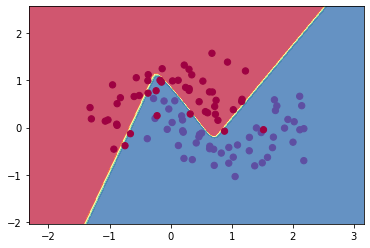

In [12]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.array([xx.ravel(), yy.ravel()]).T
Z = np.dot(Z, W1) + b1
Z = np.tanh(Z)
Z = np.dot(Z, W2) + b2
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y_, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')

```python
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
```